<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/EunjuKang/project_04/230118_commit_Project04_%EB%91%90%ED%94%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project04.두피 데이터 분석 시스템

주어진 데이터가 어떻게 구성되어 있고 어느 부분을 어떻게 활용할지 생각해봐야함 


AI Hub에서 다운로드 받은 데이터

1. Validation set: 원천데이터와 라벨링데이터

  미세각질 피지과다 모낭사이홍반 모낭홍반농포 비듬 탈모 6종류가 0-3로 분류되어 있음

2. Meta data: 각 사람에 대한 정보

데이터 구조 정리

Meta Data 디렉토리 안에는 

  0013_A2LEBJJDE00060O_1602578303771_2_TH_META.json -> 5개

  0013_A2LEBJJDE00060O_1602578303771_3_TH

  0013_A2LEBJJDE00060O_1602578303771_4_LH

  0013_A2LEBJJDE00060O_1602578303771_5_RH

  0013_A2LEBJJDE00060O_1602578303771_6_BH

위와 같이 한 사람에 대해 json 파일이 다섯개 있으며 

'0013_A2LEBJJDE00060O_1602578303771_' 가 사람마다의 고유한 값




한 증상에 대해 양호인 경우는 다른 증상들에 대해서도 양호를 보이는 경우가 많음 -> 이를 그래프로 시각화하여 서로 연관성을 확인해보고자 함

펌, 염색 여부에 따른 증상 분포 시각화

각 증상에 대한 중증도 0~3을 모두 분류하기보단 0(양호): 없음 / 1-3(경증, 중등도,중증) : 있음으로 분류 -> sigmoid 함수를 통해 나오는 확률값으로 결과를 예측하고자 함 
ex. 0.78, 0.22 -> 탈모가 있을 확률이 22% 입니다. 

모델링 목표: 새로운 사진이 입력되면 증상별로 위험도를 예측하고 사람이 성별 및 나이, 추천을 원하는지 여부를 파악하여 제품 추천

- 추가 검색이 필요한 정보들 

  남성/여성별 발병률이 높은 증상

  연령대에 따른 증상의 발병률

  펌, 염색 여부에 따른 분류 (펌, 염색은 모발 손상에 큰 영향)

  각 증상 완화에 도움이 되는 제품 조사


01/18 기준 모델링 목표 수정

Meta Data가 너무 커서 기간 안에 추천하는 모델까지 만드는 것은 불가능 ->
우선 이미지를 보면 증상을 잘 예측하는 모델 형성을 먼저 완료하기로 함

01/19 목표: 모델 및 성능 확인, 데이터 프레임 시각화, 도커 파일 생성

## 1. 데이터 확인 및 분석

### 데이터 불러오기

#### 원천 데이터

glob 로 파일명 리스트로 받아오려고 했는데 .zip 형식 파일 경로는 !unzip 명령어에서 에러 발생 -> 직접 코드로 풀기

In [ ]:
"""
!mkdir /content/scalp_data/img_zip_dir # zip 파일 저장할 디렉토리

%cd /content/scalp_data/img_zip_dir 
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_1_img.Zip'

%cd /content/scalp_data/img_data # 이미지 저장할 디렉토리
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_2_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_3_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_4_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_3.중증.zip'


%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_5_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_6_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_3.중증.zip'
"""

In [ ]:
!mkdir /content/scalp_data

In [ ]:
!mkdir /content/scalp_data/img_zip_dir # zip 파일 저장할 디렉토리

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
!mkdir /content/scalp_data/img_data # 이미지 파일 저장할 디렉토리

In [ ]:
%cd /content/scalp_data/img_zip_dir 

!unzip -qq '/content/drive/MyDrive/04_Scalp/value_4_img.Zip'
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_5_img.Zip'
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_6_img.Zip'

/content/scalp_data/img_zip_dir
[원천]모낭홍반농포_0.양호.zip:  mismatching "local" filename ([ьЫРь▓Ь]ыкиыВнэЩНы░ШыЖНэПм_0.ьЦСэШ╕.zip),
         continuing with "central" filename version
[원천]모낭홍반농포_1.경증.zip:  mismatching "local" filename ([ьЫРь▓Ь]ыкиыВнэЩНы░ШыЖНэПм_1.ъ▓╜ьжЭ.zip),
         continuing with "central" filename version
[원천]모낭홍반농포_2.중등도.zip:  mismatching "local" filename ([ьЫРь▓Ь]ыкиыВнэЩНы░ШыЖНэПм_2.ьдСыУ▒ыПД.zip),
         continuing with "central" filename version
[원천]모낭홍반농포_3.중증.zip:  mismatching "local" filename ([ьЫРь▓Ь]ыкиыВнэЩНы░ШыЖНэПм_3.ьдСьжЭ.zip),
         continuing with "central" filename version
[원천]비듬_0.양호.zip:  mismatching "local" filename ([ьЫРь▓Ь]ы╣ДыУм_0.ьЦСэШ╕.zip),
         continuing with "central" filename version
[원천]비듬_1.경증.zip:  mismatching "local" filename ([ьЫРь▓Ь]ы╣ДыУм_1.ъ▓╜ьжЭ.zip),
         continuing with "central" filename version
[원천]비듬_2.중등도.zip:  mismatching "local" filename ([ьЫРь▓Ь]ы╣ДыУм_2.ьдСыУ▒ыПД.zip),
         continuing with "central" fil

In [ ]:
"""
import os
import shutil

dir_path = '/content/scalp_data/img_zip_dir'

if os.path.exists(dir_path):
    shutil.rmtree(dir_path)
"""

In [ ]:
import glob 
import zipfile 

img_path = '/content/scalp_data/img_zip_dir'
img_path_list = glob.glob(img_path+'/*')


In [ ]:
print(img_path_list[:10])

['/content/scalp_data/img_zip_dir/[원천]탈모_3.중증.zip', '/content/scalp_data/img_zip_dir/[원천]탈모_0.양호.zip', '/content/scalp_data/img_zip_dir/[원천]비듬_1.경증.zip', '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_3.중증.zip', '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_1.경증.zip', '/content/scalp_data/img_zip_dir/[원천]비듬_3.중증.zip', '/content/scalp_data/img_zip_dir/[원천]비듬_0.양호.zip', '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_2.중등도.zip', '/content/scalp_data/img_zip_dir/[원천]비듬_2.중등도.zip', '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_0.양호.zip']


In [ ]:
for img_path in img_path_list:
  img_zip =  zipfile.ZipFile(img_path)
  img_zip.extractall('/content/scalp_data/img_data')
  img_zip.close()

In [ ]:
# 총 23568 개의 이미지

import os

file_list = os.listdir('/content/scalp_data/img_data')
print(len(file_list))

23568


In [ ]:
file_list.sort()

#### 라벨링 데이터

파이썬 zipfile 모듈 이용하면 훨씬 간단하게 불러올 수 있음

In [ ]:
!mkdir /content/scalp_data/label_data

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
import glob 
import zipfile 

path = '/content/drive/MyDrive/04_Scalp/label_zip'
path_list = glob.glob(path+'/*')

print(path_list)

['/content/drive/MyDrive/04_Scalp/label_zip/[라벨]피지과다_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]비듬_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]탈모_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]탈모_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]비듬_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]피지과다_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_0.양호.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭홍반농포_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_2.중등도.zip', 

In [ ]:
for json_path in path_list:
  json_zip = zipfile.ZipFile(json_path)
  json_zip.extractall('/content/scalp_data/label_data')
  json_zip.close()

In [ ]:
# json 파일 총 23568개 : 이미지랑 개수 동일

json_list = os.listdir('/content/scalp_data/label_data')
print(len(json_list))

23568


In [ ]:
json_list.sort()

#### 원천 vs 라벨링 데이터 비교

23568/6= 3928 -> 고유한 개인이 총 3928명인지 확인하기

In [ ]:
# 이미지 파일 : file_list
# 라벨링 파일 : json_list

print(file_list[0][:-8])
print(json_list[0][:-9])

2278_A2LEBJJDE00181Z_1606655779534_
8297_A2LEBJJDE001076_1607596628119_


In [ ]:
# 이미지 이름에서 얻는 개인의 id 목록

id_list = []

def get_person_id_from_img_name (file_name):
  id = file_name[:-8]
  id_list.append(id)

In [ ]:
for img_name in file_list:
  get_person_id_from_img_name(img_name)

print(len(id_list))

23568


In [ ]:
id_set_list = list(set(id_list))

print(len(id_set_list)) # 고유 id 값이 6580개

6580


In [ ]:
id_set_list.sort()

In [ ]:
# 라벨링 이름에서 얻는 개인의 id 목록

json_id_list = []

def get_person_id_from_json_name (file_name):
  id = file_name[:-9]
  json_id_list.append(id)

In [ ]:
for json_name in json_list:
  get_person_id_from_json_name(json_name)

In [ ]:
print(len(json_id_list))

23568


In [ ]:
json_id_set_list = list(set(json_id_list))
json_id_list.sort()

In [ ]:
print(len(json_id_set_list))

6580


확인결과 총 3928명이 아닌 6580명 이었음


In [ ]:
# id_set_list vs json_id_set_list 비교

for name in id_set_list:
  if name in json_id_set_list:
    pass
  else:
    print(name)

확인결과 서로 다른 사람이 있지는 않음 -> 모든 사람이 5개의 파일을 가지고 있지는 않음 (validation 데이터만 사용해서 그런듯 함)

In [ ]:
file_list[:10]

['0013_A2LEBJJDE00060O_1605839548962_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943763600_3_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943787774_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943787774_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1605949144786_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605949144786_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1605949385518_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605949385518_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1606386139601_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1606386139601_3_TH.jpg']

In [ ]:
json_list[:10]

['0013_A2LEBJJDE00060O_1605839548962_2_TH.json',
 '0013_A2LEBJJDE00060O_1605943763600_3_TH.json',
 '0013_A2LEBJJDE00060O_1605943787774_2_TH.json',
 '0013_A2LEBJJDE00060O_1605943787774_6_BH.json',
 '0013_A2LEBJJDE00060O_1605949144786_2_TH.json',
 '0013_A2LEBJJDE00060O_1605949144786_6_BH.json',
 '0013_A2LEBJJDE00060O_1605949385518_2_TH.json',
 '0013_A2LEBJJDE00060O_1605949385518_6_BH.json',
 '0013_A2LEBJJDE00060O_1606386139601_2_TH.json',
 '0013_A2LEBJJDE00060O_1606386139601_3_TH.json']

## 2. 데이터 전처리

모델링 목표: 이미지를 입력하면 예측해서 여섯가지 증상에 대해 각자의 여부를 출력하는 모델

output layer는 dense: 6, activation func: sigmoid 를 사용 -> [0.01, 0.78, 0.98, 0.89, 0.02, 0.22] 

-> 미세각질 없음, 피지과다 78%, 모낭사이홍반 98%, 모낭홍반/농포 89%, 비듬 2%, 탈모 22%


이 데이터와 Meta 데이터 + 추가로 상품조사를 따로 하면 제품 추천까지 할 수 있음

각 이미지의 RGB 값: x_train

json 에서 해당 증상에 대한 : y_train

이미지 이름을 전달하면 해당 라벨링 파일을 불러오도록 함

In [ ]:
# 이미지 이름: file_list
# json 이름: json_list

In [ ]:
# .jpg -> .json 으로 변환하는 함수

def img_name_to_json_name(img_name):
  file_name = img_name[:-4]
  file_name = file_name + '.json'
  return (file_name)

In [ ]:
# .json data를 전달하면 각 증상별 유뮤를 리스트로 반환하는 함수 ex. [0,0,0,0,0,0]

# 증상이 0이면 0, 1~3이면 1

def binary_div(value):
  if int(value) == 0:
    return 0
  else:
    return 1

# [0,1,0,0,1,0] 같은 6차원 리스트 반환

def value_list_from_json(json_data):
  value_list = []
  value_list.append(binary_div(json_data['value_1']))
  value_list.append(binary_div(json_data['value_2']))
  value_list.append(binary_div(json_data['value_3']))
  value_list.append(binary_div(json_data['value_4']))
  value_list.append(binary_div(json_data['value_5']))
  value_list.append(binary_div(json_data['value_6']))
  return value_list

In [ ]:
# 확인

json_path = '/content/scalp_data/label_data/0013_A2LEBJJDE00060O_1605839548962_2_TH.json'

import json

with open(json_path, 'r') as file:
    data = json.load(file)

print(value_list_from_json(data))

<class 'dict'>
0
<class 'str'>


In [ ]:
print(value_list_from_json(data))

[0, 1, 0, 1, 0, 1]


#### dataset 형성

In [ ]:
# dataset 만들기

import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json

x_data = []
y_data = []

img_dir_path = '/content/scalp_data/img_data'
# img_path: img_dir_path + '/' + img_name
# /content/scalp_data/img_data/0013_A2LEBJJDE00060O_1605839548962_2_TH.jpg

json_dir_path = '/content/scalp_data/label_data'
# json_path : json_dir_path + '/' + img_name_to_json_name(img_name)
# /content/scalp_data/label_data/0013_A2LEBJJDE00060O_1605839548962_2_TH.json

for img_name in file_list:
  img_path = img_dir_path + '/' + img_name
  img = PIL.Image.open(img_path)
  #plt.imshow(img)
  #plt.show()
  img = img.convert('RGB')
  img = img.resize((75,75))
  np_img = np.array(img)
  np_img = np_img / 255.0
  x_data.append(np_img)

  # json에서 증상별 리스트 가져오기
  label_list = []
  json_path = json_dir_path + '/' + img_name_to_json_name(img_name)
  with open(json_path, 'r') as file:
    data = json.load(file)
    label_list = value_list_from_json(data)
    label_list = np.array(label_list)
    y_data.append(label_list)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
x_data.shape

(23568, 75, 75, 3)

In [ ]:
y_data.shape

(23568, 6)

Data augmentation: 이미 데이터가 너무 많아서 augmentation은 하지 않기로 함

매 런타임마다 데이터 전처리를 하지 않도록 전처리한 이미지와 라벨링 numpy 배열을 저장

In [ ]:
np.save('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy', x_data)

In [ ]:
np.save('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy', y_data)

#### 매 런타임마다 여기서부터 실행하면 됨

In [ ]:
# 저장해둔 numpy 배열 불러오기

import numpy as np

x_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy')
y_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy')

In [ ]:
x_data.shape

(23568, 75, 75, 3)

In [ ]:
y_data.shape

(23568, 6)

## 3. 학습 및 성능 확인 

### Model1. Mnist 모델 이용

1번째 시도

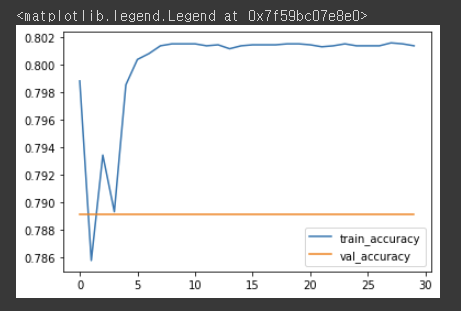

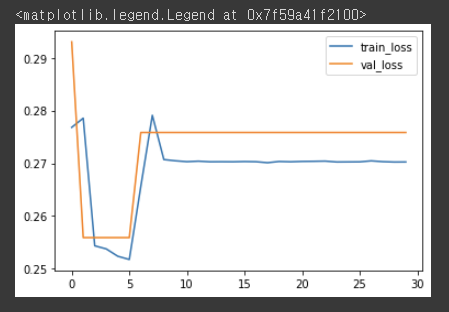

accuracy & loss 가 일정하게 나오는 것을 보니 metric과 loss가 잘못 설정되었다고 추측

-> metric은 accuracy가 아닌 mae 로, loss 는 sprase_categorical_crossentropy가 아닌 mse로 수정 + train, val, test도 6:2:2가 아닌 8:2로 분할 

2번째 시도

In [ ]:
# train/test 8:2 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

x_val = x_test[:2]
x_test = x_test[2:]

y_val = y_test[:2]
y_test = y_test[2:]

In [ ]:
from sklearn.metrics import mean_absolute_error

cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 30)

Epoch 1/30
629/629 [==============================] - 35s 41ms/step - loss: 0.1631 - mae: 0.3170 - val_loss: 0.1504 - val_mae: 0.3067
Epoch 2/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1510 - mae: 0.2953 - val_loss: 0.1459 - val_mae: 0.3057
Epoch 3/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1465 - mae: 0.2875 - val_loss: 0.1429 - val_mae: 0.2910
Epoch 4/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1439 - mae: 0.2818 - val_loss: 0.1454 - val_mae: 0.2924
Epoch 5/30
629/629 [==============================] - 25s 41ms/step - loss: 0.1414 - mae: 0.2778 - val_loss: 0.1401 - val_mae: 0.2731
Epoch 6/30
629/629 [==============================] - 25s 40ms/step - loss: 0.1401 - mae: 0.2752 - val_loss: 0.1468 - val_mae: 0.2857
Epoch 7/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1364 - mae: 0.2677 - val_loss: 0.1412 - val_mae: 0.2656
Epoch 8/30
629/629 [==============================] - 25s 40ms

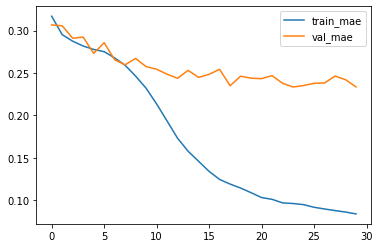

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

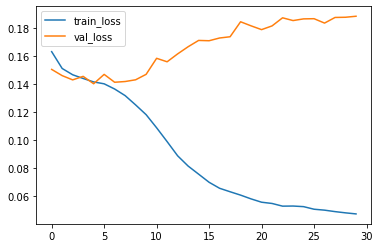

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

3번째 시도 - 8:2 가 아닌 6:2:2로 분할

In [ ]:
# train/val/test 나누기 6:2:2 로 분할

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.4)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def create_cnn_model ():
  model = tf.keras.models.Sequential() # 객체 생성 
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', input_shape = (75, 75, 3))) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,64)
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,64)
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,1)
  model.add(tf.keras.layers.Flatten()) #flatten : 28 * 28 2차원 데이터를 일렬로 나열하는 것
  model.add(tf.keras.layers.Dense(64, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2)) # droupout: 너무 특정 feature에만 집중하지 않도록 설정한 부분의 weight 값을 잠시 무시하는 것
  model.add(tf.keras.layers.Dense(6, activation = 'sigmoid')) 
  return model


In [ ]:
cnn_model = create_cnn_model()

In [ ]:
from sklearn.metrics import mean_absolute_error

cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, batch_size = 30)

Epoch 1/30
472/472 [==============================] - 29s 43ms/step - loss: 0.1701 - mae: 0.3271 - val_loss: 0.1525 - val_mae: 0.3020
Epoch 2/30
472/472 [==============================] - 19s 41ms/step - loss: 0.1555 - mae: 0.3042 - val_loss: 0.1480 - val_mae: 0.3010
Epoch 3/30
472/472 [==============================] - 20s 43ms/step - loss: 0.1520 - mae: 0.2970 - val_loss: 0.1447 - val_mae: 0.2944
Epoch 4/30
472/472 [==============================] - 19s 41ms/step - loss: 0.1480 - mae: 0.2893 - val_loss: 0.1425 - val_mae: 0.2851
Epoch 5/30
472/472 [==============================] - 20s 42ms/step - loss: 0.1443 - mae: 0.2826 - val_loss: 0.1446 - val_mae: 0.2753
Epoch 6/30
472/472 [==============================] - 20s 43ms/step - loss: 0.1417 - mae: 0.2778 - val_loss: 0.1478 - val_mae: 0.2961
Epoch 7/30
472/472 [==============================] - 19s 41ms/step - loss: 0.1392 - mae: 0.2728 - val_loss: 0.1502 - val_mae: 0.2820
Epoch 8/30
472/472 [==============================] - 19s 41ms

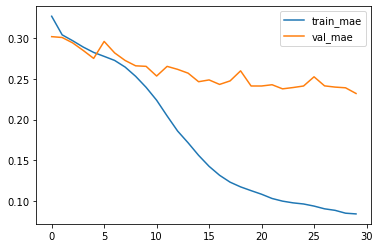

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

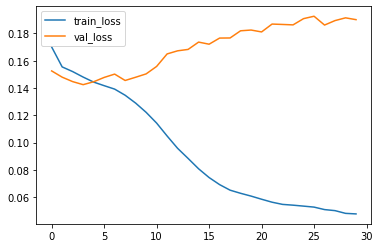

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

예측해보기

In [ ]:
test_x = np.expand_dims(x_test[0], axis = 0)

In [ ]:
result = cnn_model.predict(test_x)

1/1 [==============================] - 0s 165ms/step


In [ ]:
print(result)

[[1.5265205e-07 9.9999988e-01 9.7365046e-01 9.2365519e-07 2.3832865e-02
  2.1515000e-06]]


In [ ]:
print(y_test[0])

[0 1 1 0 0 0]


[[1.5265205e-07 9.9999988e-01 9.7365046e-01 9.2365519e-07 2.3832865e-02
  2.1515000e-06]] 

  -> 0% 99% 97% 2% 0% 0% vs [0 1 1 0 0 0]

꽤 잘 예측해낸 것으로 생각됨



overfitting을 막기 위해 early stopping을 도입해봄

### Model2. Mnist 모델 + early stopping

In [ ]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping()

In [ ]:
cnn_model = create_cnn_model()

In [ ]:
cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 30, callbacks = [early_stopping])

Epoch 1/30
629/629 [==============================] - 34s 42ms/step - loss: 0.2188 - mae: 0.2959 - val_loss: 0.1594 - val_mae: 0.3074
Epoch 2/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1585 - mae: 0.3099 - val_loss: 0.1515 - val_mae: 0.2998


학습 에포크가 2번하고 종료

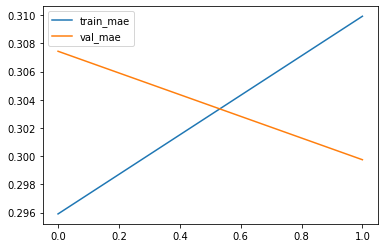

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

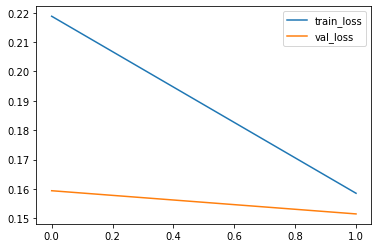

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

예측해보기

In [ ]:
val_x = np.expand_dims(x_val[0], axis = 0)

In [ ]:
result = cnn_model.predict(val_x)

1/1 [==============================] - 0s 148ms/step


In [ ]:
print(result)

[[0.14363179 0.822696   0.93416965 0.0069321  0.3507987  0.5323654 ]]


In [ ]:
print(y_val[0])

[0 1 1 1 0 0]


[ 0.14363179 0.822696   0.93416965 0.0069321  0.3507987  0.5323654 ] 

-> 14% 82% 93% 0% 35% 53%  vs [0 1 1 1 0 0]

early stopping을 하지 않은 모델이 더 높은 적중률을 보임 -> early stopping을 도입하는건 좋지 않은 방법이라 생각됨

### Model3. EfficientNet을 이용한 Fine-tuning

In [ ]:
# 다른 코랩 파일 (Project04.두피_데이터_분석_시스템_2nd)

### Model4. InceptionV3 를 이용한 Fine-tuning

## 4. Meta 데이터 분석

In [ ]:
!mkdir /content/drive/MyDrive/04_Scalp/Meta/meta_data # zip 파일 저장할 디렉토리

%cd /content/drive/MyDrive/04_Scalp/Meta/meta_data 
!unzip -qq '/content/drive/MyDrive/04_Scalp/Meta/META_DATA.zip'

/content/drive/MyDrive/04_Scalp/Meta/meta_data


In [ ]:
import glob 

meta_path = '/content/drive/MyDrive/04_Scalp/Meta/meta_data'
meta_path_list = glob.glob(meta_path+'/*')

In [ ]:
with open('/content/drive/MyDrive/04_Scalp/Meta/meta_data_list/meta_data_list.txt','w') as f:
    for path in meta_path_list:
        f.write(path)

NotADirectoryError: ignored

In [ ]:
print(len(meta_path_list))

101027


메타데이터 전부를 이용하기엔 너무 json파일이 많아서 추후에 일부만 이용해서 분석하기

## 5. 라벨링 데이터 분석 

각 증상간에 연관성이 있는지 시각화를 통해 파악해보기

json 파일을 정리해서 dataframe으로 만들고 .csv로 저장하기

+ 라벨링 데이터 압축 해제해서 구글 드라이브에 저장

In [1]:
# 압축해제한 파일 저장할 디렉토리

!mkdir /content/drive/MyDrive/04_Scalp/label_data

In [2]:
# 압축 해제해서 디렉토리에 저장

import glob 
import zipfile 

path = '/content/drive/MyDrive/04_Scalp/label_zip'
path_list = glob.glob(path+'/*')

In [3]:
print(path_list)

['/content/drive/MyDrive/04_Scalp/label_zip/[라벨]피지과다_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]비듬_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]탈모_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]탈모_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]비듬_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]피지과다_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_0.양호.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭홍반농포_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_2.중등도.zip', 

In [4]:
for json_path in path_list:
  json_zip = zipfile.ZipFile(json_path)
  json_zip.extractall('/content/drive/MyDrive/04_Scalp/label_data')
  json_zip.close()

In [7]:
# json 파일 총 23568개 : 이미지랑 개수 동일

import os

json_list = os.listdir('/content/drive/MyDrive/04_Scalp/label_data')
print(len(json_list))

23568


In [9]:
json_list.sort()

In [10]:
print(json_list[:10])

['0013_A2LEBJJDE00060O_1605839548962_2_TH.json', '0013_A2LEBJJDE00060O_1605943763600_3_TH.json', '0013_A2LEBJJDE00060O_1605943787774_2_TH.json', '0013_A2LEBJJDE00060O_1605943787774_6_BH.json', '0013_A2LEBJJDE00060O_1605949144786_2_TH.json', '0013_A2LEBJJDE00060O_1605949144786_6_BH.json', '0013_A2LEBJJDE00060O_1605949385518_2_TH.json', '0013_A2LEBJJDE00060O_1605949385518_6_BH.json', '0013_A2LEBJJDE00060O_1606386139601_2_TH.json', '0013_A2LEBJJDE00060O_1606386139601_3_TH.json']


+ 고유한 개인 6580명의 json 파일 한개씩 추출하기

In [16]:
json_id_list = []

def get_person_id_from_json_name (file_name):
  id = file_name[:-9]
  json_id_list.append(id)

In [17]:
for json_name in json_list:
  get_person_id_from_json_name(json_name)

In [18]:
json_id_set_list = list(set(json_id_list))

In [19]:
json_id_list.sort()

In [20]:
print(len(json_id_set_list))

6580


In [21]:
print(json_id_set_list[0])

0715_A2LEBJJDE00175D_1607492696385_


In [25]:
count = 0

find_two_json = json_id_set_list.copy()
two_exist = []

for json_id in json_id_set_list:
  name = json_id + '2_TH.json'
  if name in json_list:
    two_exist.append(name)
    find_two_json.remove(json_id)
  else:
    count += 1

In [26]:
print(count)

1986


In [27]:
print(len(two_exist))

4594


In [28]:
print(two_exist[:10])

#two_exist: 고유한 개인의 json file 이름 4594개

['0715_A2LEBJJDE00175D_1607492696385_2_TH.json', '3269_A2LEBJJDE00096Y_1608249507669_2_TH.json', '5305_A2LEBJJDE00122T_1606552377204_2_TH.json', '2720_A2LEBJJDE000401_1606455684109_2_TH.json', '5569_A2LEBJJDE001211_1606381715485_2_TH.json', '1981_A2LEBJJDE001493_1606633382957_2_TH.json', '1221_A1LCAIHDH00009X_1607750972382_2_TH.json', '1221_A1LCAIHDH00009X_1608429233627_2_TH.json', '4795_A2LEBJJDE00113S_1606441632292_2_TH.json', '2637_A2LEBJJDE00099D_1606728195064_2_TH.json']


In [29]:
print(len(find_two_json))

1986


In [30]:
count = 0

find_three_json = find_two_json.copy()

three_exist = []

for json_id in find_two_json:
  name = json_id + '3_TH.json'
  if name in json_list:
    three_exist.append(name)
    find_three_json.remove(json_id)
  else:
    count += 1

In [31]:
print(count)

1117


In [32]:
print(len(three_exist))

869


In [33]:
print(three_exist[:10])

# three_exist : 고유한 개인의 json file 이름 869개

['2688_A2LEBJJDE00115E_1607585844561_3_TH.json', '6440_A2LEBJJDE001352_1606183312175_3_TH.json', '4810_A2LEBJJDE00177Y_1606091225331_3_TH.json', '3085_A2LEBJJDE00128M_1606190739155_3_TH.json', '6078_A2LEBJJDE00160J_1606098339746_3_TH.json', '7366_A2LEBJJDE00088Q_1606990428297_3_TH.json', '3006_A1LCAIHDH00007C_1608347770229_3_TH.json', '0844_A2LEBJJDE00067A_1605863056399_3_TH.json', '0770_A2LEBJJDE000865_1606541360657_3_TH.json', '9202_A2LEBJJDE00082X_1606310691658_3_TH.json']


In [34]:
count = 0

find_four_json = find_three_json.copy()

four_exist = []

for json_id in find_three_json:
  name = json_id + '4_LH.json'
  if name in json_list:
    four_exist.append(name)
    find_four_json.remove(json_id)
  else:
    count += 1

In [35]:
print(len(four_exist))

605


In [39]:
print(four_exist[:10])

# four_exist: 고유한 개인의 json file 이름 605개

['7168_A2LEBJJDE00124F_1606277750797_4_LH.json', '7670_A1LCAIHDH000126_1607659798373_4_LH.json', '4263_A2LEBJJDE00062A_1606613447044_4_LH.json', '7851_A2LEBJJDE00074P_1607091136745_4_LH.json', '9244_A2LEBJJDE00154W_1607590354436_4_LH.json', '1142_A2LEBJJDE00024K_1606730197812_4_LH.json', '1069_A2LEBJJDE00094D_1606458258744_4_LH.json', '5619_A2LEBJJDE00002B_1606040304699_4_LH.json', '1983_A2LEBJJDE00188L_1606101773870_4_LH.json', '6995_A2LEBJJDE00104R_1606787381358_4_LH.json']


In [37]:
print(len(find_four_json))

512


In [40]:
count = 0

find_five_json = find_four_json.copy()

five_exist = []

for json_id in find_four_json:
  name = json_id + '5_RH.json'
  if name in json_list:
    five_exist.append(name)
    find_five_json.remove(json_id)
  else:
    count += 1

In [41]:
print(len(five_exist))

# five_exist: 고유한 개인의 json file 이름 302개

302


In [42]:
print(five_exist[:10])

['5438_A2LEBJJDE00159W_1606266389394_5_RH.json', '2326_A2LEBJJDE001998_1609668111407_5_RH.json', '3275_A2LEBJJDE001766_1605949229215_5_RH.json', '9578_A2LEBJJDE00105K_1605946040904_5_RH.json', '3085_A2LEBJJDE00128M_1606033474941_5_RH.json', '0643_A2LEBJJDE00048F_1606632704103_5_RH.json', '1407_A2LEBJJDE001258_1605948290606_5_RH.json', '2602_A1LCAIHDH00013Y_1609579597726_5_RH.json', '8802_A2LEBJJDE00174K_1608699607350_5_RH.json', '1237_A2LEBJJDE001584_1606114699100_5_RH.json']


In [43]:
count = 0

find_six_json = find_five_json.copy()

six_exist = []

for json_id in find_five_json:
  name = json_id + '6_BH.json'
  if name in json_list:
    six_exist.append(name)
    find_six_json.remove(json_id)
  else:
    count += 1

In [44]:
print(len(find_six_json))

0


In [45]:
print(len(six_exist))

# six_exist: 고유한 개인의 json file 이름 210개

210


In [ ]:
# two_exist: 고유한 개인의 json file 이름 4594개
# three_exist : 고유한 개인의 json file 이름 869개
# four_exist: 고유한 개인의 json file 이름 605개
# five_exist: 고유한 개인의 json file 이름 302개
# six_exist: 고유한 개인의 json file 이름 210개
# 총 6580개 

In [46]:
print(two_exist)

['0715_A2LEBJJDE00175D_1607492696385_2_TH.json', '3269_A2LEBJJDE00096Y_1608249507669_2_TH.json', '5305_A2LEBJJDE00122T_1606552377204_2_TH.json', '2720_A2LEBJJDE000401_1606455684109_2_TH.json', '5569_A2LEBJJDE001211_1606381715485_2_TH.json', '1981_A2LEBJJDE001493_1606633382957_2_TH.json', '1221_A1LCAIHDH00009X_1607750972382_2_TH.json', '1221_A1LCAIHDH00009X_1608429233627_2_TH.json', '4795_A2LEBJJDE00113S_1606441632292_2_TH.json', '2637_A2LEBJJDE00099D_1606728195064_2_TH.json', '3977_A2LCBJCAC000073_1607325669500_2_TH.json', '2762_A2LEBJJDE000498_1606465144496_2_TH.json', '1195_A2LEBJJDE00197M_1606803458878_2_TH.json', '3216_A1LCAIHDH00006J_1608350265926_2_TH.json', '0617_A2LEBJJDE000815_1606214032662_2_TH.json', '6570_A2LEBJJDE001675_1607392421213_2_TH.json', '6570_A2LEBJJDE001675_1607828793403_2_TH.json', '7978_A2LEBJJDE00071B_1606545187822_2_TH.json', '9244_A2LEBJJDE00154W_1607590572671_2_TH.json', '4307_A2LEBJJDE000683_1606733880262_2_TH.json', '2278_A2LEBJJDE00181Z_1606655505213_2_T

In [47]:
print(three_exist)

['2688_A2LEBJJDE00115E_1607585844561_3_TH.json', '6440_A2LEBJJDE001352_1606183312175_3_TH.json', '4810_A2LEBJJDE00177Y_1606091225331_3_TH.json', '3085_A2LEBJJDE00128M_1606190739155_3_TH.json', '6078_A2LEBJJDE00160J_1606098339746_3_TH.json', '7366_A2LEBJJDE00088Q_1606990428297_3_TH.json', '3006_A1LCAIHDH00007C_1608347770229_3_TH.json', '0844_A2LEBJJDE00067A_1605863056399_3_TH.json', '0770_A2LEBJJDE000865_1606541360657_3_TH.json', '9202_A2LEBJJDE00082X_1606310691658_3_TH.json', '9578_A2LEBJJDE00105K_1605944055238_3_TH.json', '4370_A1LCAIHDH00005Q_1607929245283_3_TH.json', '9244_A2LEBJJDE00154W_1606796069817_3_TH.json', '6367_A2LEBJJDE00038L_1607575368063_3_TH.json', '9864_A2LEBJJDE001167_1608957263215_3_TH.json', '6121_A2LEBJJDE00183L_1606226229975_3_TH.json', '4919_A2LEBJJDE00064V_1606193008191_3_TH.json', '2326_A2LEBJJDE001998_1608196939722_3_TH.json', '6775_A2LEBJJDE00022Y_1605696960316_3_TH.json', '7418_A2LEBJJDE00080C_1606116088364_3_TH.json', '3977_A2LEBJJDE00161C_1606442092164_3_T

In [48]:
print(four_exist)

['7168_A2LEBJJDE00124F_1606277750797_4_LH.json', '7670_A1LCAIHDH000126_1607659798373_4_LH.json', '4263_A2LEBJJDE00062A_1606613447044_4_LH.json', '7851_A2LEBJJDE00074P_1607091136745_4_LH.json', '9244_A2LEBJJDE00154W_1607590354436_4_LH.json', '1142_A2LEBJJDE00024K_1606730197812_4_LH.json', '1069_A2LEBJJDE00094D_1606458258744_4_LH.json', '5619_A2LEBJJDE00002B_1606040304699_4_LH.json', '1983_A2LEBJJDE00188L_1606101773870_4_LH.json', '6995_A2LEBJJDE00104R_1606787381358_4_LH.json', '1983_A2LEBJJDE00188L_1606101857968_4_LH.json', '2996_A2LEBJJDE00083Q_1605950878038_4_LH.json', '5255_A2LEBJJDE00007B_1606101712869_4_LH.json', '1080_A2LEBJJDE00092R_1606124019620_4_LH.json', '5939_A2LEBJJDE00129F_1606527024559_4_LH.json', '5939_A2LEBJJDE00129F_1608280846116_4_LH.json', '8297_A2LEBJJDE001076_1608612190234_4_LH.json', '1080_A2LEBJJDE00092R_1606104507896_4_LH.json', '5438_A2LEBJJDE00159W_1606266639587_4_LH.json', '3275_A2LEBJJDE001766_1605961162557_4_LH.json', '8999_A2LEBJJDE00001I_1606008784419_4_L

In [49]:
print(five_exist)

['5438_A2LEBJJDE00159W_1606266389394_5_RH.json', '2326_A2LEBJJDE001998_1609668111407_5_RH.json', '3275_A2LEBJJDE001766_1605949229215_5_RH.json', '9578_A2LEBJJDE00105K_1605946040904_5_RH.json', '3085_A2LEBJJDE00128M_1606033474941_5_RH.json', '0643_A2LEBJJDE00048F_1606632704103_5_RH.json', '1407_A2LEBJJDE001258_1605948290606_5_RH.json', '2602_A1LCAIHDH00013Y_1609579597726_5_RH.json', '8802_A2LEBJJDE00174K_1608699607350_5_RH.json', '1237_A2LEBJJDE001584_1606114699100_5_RH.json', '9874_A2LEBJJDE00123M_1608956486604_5_RH.json', '1237_A2LEBJJDE001584_1606114033196_5_RH.json', '7698_A2LEBJJDE00165J_1606114701958_5_RH.json', '4070_A2LEBJJDE000266_1605761377791_5_RH.json', '9578_A2LEBJJDE00105K_1608953645154_5_RH.json', '3006_A1LCAIHDH00007C_1608537805049_5_RH.json', '3755_A2LEBJJDE001857_1608270362084_5_RH.json', '4795_A2LEBJJDE00113S_1606024761458_5_RH.json', '9887_A2LEBJJDE00066H_1606187076935_5_RH.json', '9338_A2LEBJJDE00101D_1606737835036_5_RH.json', '6367_A2LEBJJDE00038L_1606022286101_5_R

In [50]:
print(six_exist)

['3275_A2LEBJJDE001766_1606200471630_6_BH.json', '2800_A2LEBJJDE00036Z_1605934724335_6_BH.json', '3006_A1LCAIHDH00007C_1608279332286_6_BH.json', '4307_A2LEBJJDE000683_1606654833520_6_BH.json', '4232_A2LEBJJDE00146O_1606968690585_6_BH.json', '4263_A2LEBJJDE00062A_1606623899042_6_BH.json', '9338_A2LEBJJDE00101D_1606112312850_6_BH.json', '7978_A2LEBJJDE00071B_1606645138876_6_BH.json', '5569_A2LEBJJDE001211_1609045041662_6_BH.json', '1069_A2LEBJJDE00094D_1607049085395_6_BH.json', '8111_A2LEBJJDE00112Z_1605946821048_6_BH.json', '2602_A1LCAIHDH00013Y_1609579741099_6_BH.json', '3365_A2LEBJJDE00106D_1606030600728_6_BH.json', '5849_A2LEBJJDE00015J_1605928590040_6_BH.json', '9338_A2LEBJJDE00101D_1606019987588_6_BH.json', '2326_A2LEBJJDE001998_1606210163089_6_BH.json', '2820_A2LEBJJDE00179K_1605694131266_6_BH.json', '3006_A1LCAIHDH00007C_1608612515526_6_BH.json', '7366_A2LEBJJDE00143A_1605955098808_6_BH.json', '2996_A2LEBJJDE00083Q_1605952612893_6_BH.json', '3332_A2LEBJJDE00100K_1605864790701_6_B

In [53]:
total_json = []

In [54]:
for json_list in [two_exist, three_exist, four_exist, five_exist, six_exist]:
  for name in json_list:
    total_json.append(name)

In [55]:
print(len(total_json))

# total_json: unique 한 개인의 json 이름

6580


+ 데이터 프레임 형성하기